## Before starting: select R kernel

    In the menu bar on top of this notebook, select Kernel > Change Kernel > R

    In the top right corner, the R logo should be visible next to "Logout" button and "R" should be written next to the circle monitoring kernel activity.



# (Step3) Evaluate the alignment prediction compared to the groundtruth alignment

The alignment prediction has been generated by `sm-dtw` (*Step2*).

The groundtruth alignment was generated when the paired 'reference' and 'test' sequences were generated (*Step1*).

**Reminder**: some definitions
- a **phyllotaxis sequence** is an ordered sequence of values representing the divergence angles and internode length between 'organs' (e.g. leaves, fruits, flowers, branches) along the stem of a plant
- a **pair of sequences** are two related sequences: one "reference" and one "test" derived from the "reference" after several modifications (e.g. "errors" of phenotyping).

## 1. Import data from Step1 (simulation) and Step2 (alignment prédiction with sm-dtw)

### 1.1. Import the simulated paired sequences (Step1)

In [22]:
wdir="/myapp/docker_sandbox/" #store the path of working folder

seqs=read.csv(paste0(wdir,"reference_sequences.csv"))
colnames(seqs)[3]="internodes" #fix the capital I for internodes
tests=read.csv(paste0(wdir,"test_sequences.csv"))
colnames(tests)[3]="internodes" #fix the capital I for internodes
align.gt=read.csv(paste0(wdir,"align_intervals.csv"))

### 1.2. Import the result of `sm-dtw` (prediction of the alignment between the paired sequence(s); Step2)
/!\ Check that the alignment prediction corresponds to the data of the paired sequences you upload. If not, re-run `sm-dtw` with Step2 notebook on these data

In [23]:
raw_predictions=read.csv(paste0(wdir,"smdtw_result.csv"), header=TRUE)

## 2. Convert `sm-dtw` results into a biologically interpretable alignment

In [24]:
source("../../source/plot_sequences_sources.R") #library for plotting
source('../../source/eval_dtw_sources.R') #library to evaluate dtw prediction

In [25]:
View(raw_predictions)

PlantID,test,reference,type,cost
<chr>,<int>,<int>,<chr>,<dbl>
MyPlant,0,2,~,14.422205
MyPlant,1,3,~,14.142136
MyPlant,2,5,s,18.973666
MyPlant,4,6,m,89.844310
MyPlant,5,7,~,25.079872
MyPlant,6,8,~,4.123106
MyPlant,7,9,~,2.828427
MyPlant,8,10,~,31.064449
MyPlant,9,11,~,10.816654


In [26]:
dtw_results=convert_dtw_results(raw_predictions, seq.ref = seqs, seq.test = tests)

Converting dtw results for PlantID = MyPlant 


## 3. Evaluate the alignment predicted by `sm-dtw`

### 3. 1. Compare the groundtruth and predicted alignment table

In [28]:
prediction_eval=evaluate_align_prediction(dtw_results=dtw_results, true_align=align.gt, verbose = TRUE)
#View(prediction_eval)
head(prediction_eval)

## Starting analysis for PlantID = MyPlant .
[1] "both reference sequence have 24 intervals"
[1] "both test sequences (before/after dtw) have 21 intervals"


,PlantID,test.interval,N.align,align.score,dtw.predict,dtw.true,dtw.cost,code.eval,dtw.eval
,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,MyPlant,1,1,0.5,~,CT,14.42221,error,error
2,MyPlant,2,1,0.5,~,M,14.14214,error,error
3,MyPlant,3,2,NA,S,M,18.97367,error,error
4,MyPlant,4,1,0.5,M,~,89.84431,error,error
5,MyPlant,5,1,0.5,M,~,89.84431,error,error
6,MyPlant,6,1,0.5,~,~,25.07987,correct,error


### 3.2. Side-to-side plotting of the prediction with the ground truth
In addition to the plots displayed below the code cell of the notebook, a pdf with the plot(s) can be automatically generated as well if the option PDF is set to TRUE.

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 row(

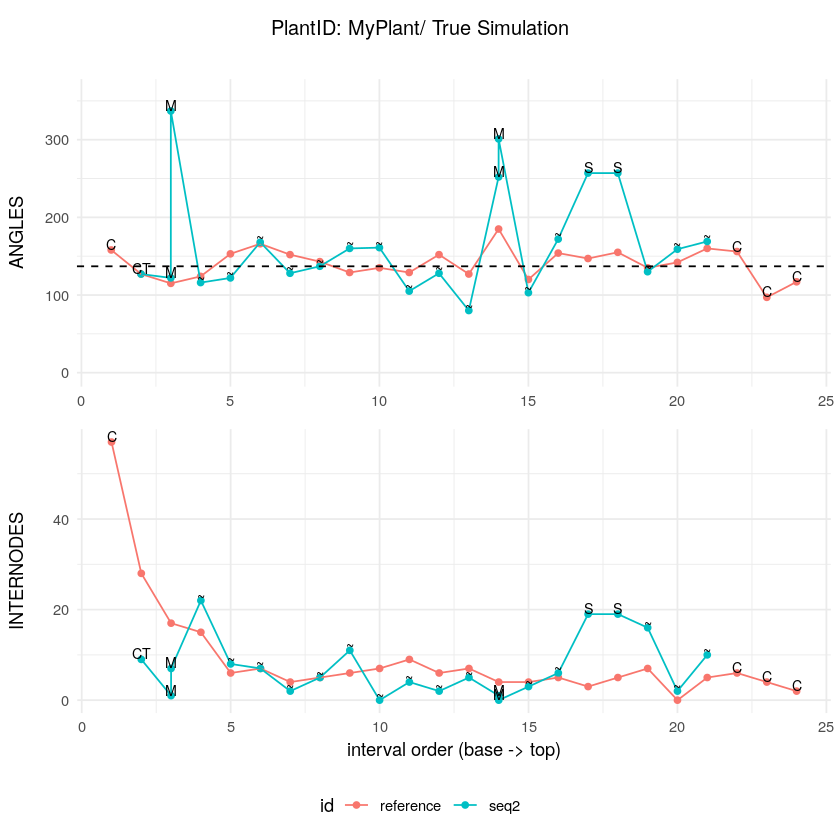

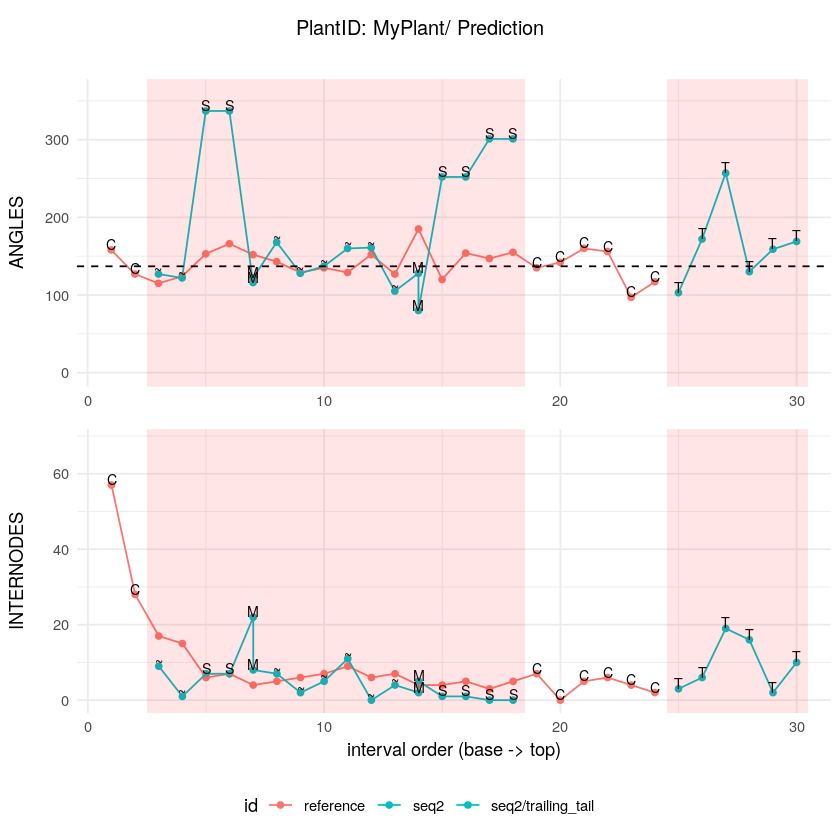

In [29]:
rdir=getwd() # store the running directory (corresponding to the notebook location)
setwd(wdir)  # output directory for potential pdf

compare_plots(seq.ref=seqs, seq.test=tests, true.align=align.gt, dtw.results = dtw_results,  
              prediction.eval= prediction_eval #the previous analysis is re-used in the plot
              #PlantID =c("Plant#1", "Plant#2"),  #default: plots are drawned for all plants
              #PDF=TRUE, pdf.name = "test.pdf",   #default: PDF=TRUE, pdf.name = "Compare_Prediction_Plots.pdf"
              #verbose = FALSE # default=FALSE, recommanded for debug only
             )

# Note: warning messages of the plotting function are frequent and normal, especially if the two sequences do not have the same length.

setwd(rdir) # reset the working directory to the initial value (so that cells can be run several time without restaring the kernel)

### 3.3. Summary statistics on the quality of the prediction

In [30]:
summarize_prediction_eval(prediction_eval, align.gt, verbose=TRUE)

## Processing PlantID = MyPlant .


plantid,N.ref,N.test,N.dtw.align,Correct.ratio,Match.correct.ratio,NonMatch.correct.ratio,longest.correct.segment
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
MyPlant,24,21,15,0,0,0,0


## 4. Use the alignment prediction as a trustful prediction to evaluate the 'test' measure

In [21]:
summarize_align_prediction(dtw_results, seqs, tests, count.as = "number")

PlantID,Ref.seq.length,Test.seq.length,Nb.chop.start,Nb.chop.end,Nb.tail.start,Nb.tail.end,Nb.SPLIT.event,Nb.organs.missed.per.SPLIT,Nb.MERGE.event,Nb.organs.added.per.MERGE,TOTAL.ORGAN.MISS,TOTAL.ORGAN.ADDED,TOTAL.SEGMENTATION.ERROR,TOTAL.MATCH,LONGEST.MATCH,ANGLES.difference,ANGLES.sd,INTERNODES.difference,INTERNODES.sd
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MyPlant,19,18,0,2,1,2,3,"1,1,1",1,1,5,4,9,10,8,-5.5,30.70016,2.4,3.405877


# End of Step3